In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git
%cd keras-retinanet/
!pip install .
!python setup.py build_ext --inplace
%cd ..

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5862, done.
remote: Total 5862 (delta 0), reused 0 (delta 0), pack-reused 5862
Receiving objects: 100% (5862/5862), 13.40 MiB | 29.90 MiB/s, done.
Resolving deltas: 100% (3948/3948), done.
/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170790 sha256=cd8f3f85af2631f835572eb2280743e39c0c05697b5fe6c475aa99f8e6509c7e
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=90e7ea8c6e285935dcad23c39a5939fef151fd727f7d9baa552ee385ca81148e
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet
running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_

In [ ]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

Using TensorFlow backend.


In [ ]:
classes = ['Bookcase','Bathtub', 'Pillow' ,'Couch', 'Gas stove', 'Washing machine' ,'Bed',
 'Refrigerator', 'Bathroom accessory', 'Kitchen & dining room table',
 'Television' ,'Sink' ,'Sofa bed' ,'Kitchenware' ,'Toilet' ,'Ceiling fan',
 'Microwave oven', 'Furniture', 'Coffeemaker', 'Cupboard', 'Dishwasher',
 'Shower' ,'Clock' ,'Countertop' ,'Mug', 'Table']

labels_to_names = dict()
for id, name in enumerate(classes):
    labels_to_names[id] = name

In [ ]:
!retinanet-convert-model /content/resnet50_csv_06.h5 /content/model.h5

Using TensorFlow backend.
2020-07-19 09:45:45.215442: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-19 09:45:47.012097: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-19 09:45:47.094950: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-07-19 09:45:47.095032: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (39b41e8fa816): /proc/driver/nvidia/version does not exist
Traceback (most recent call last):
  File "/usr/local/bin/retinanet-convert-model", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.6/dist-packages/keras_retinanet/bin/convert_model.py", line 79, in main
    model = models.load_model(args.model_in, backbone_name=args.backbone)
  File "/usr/local/l

In [ ]:
model_path = '/content/model.h5'

In [ ]:
model = models.load_model(model_path, backbone_name='resnet50')

processing time:  6.755298376083374


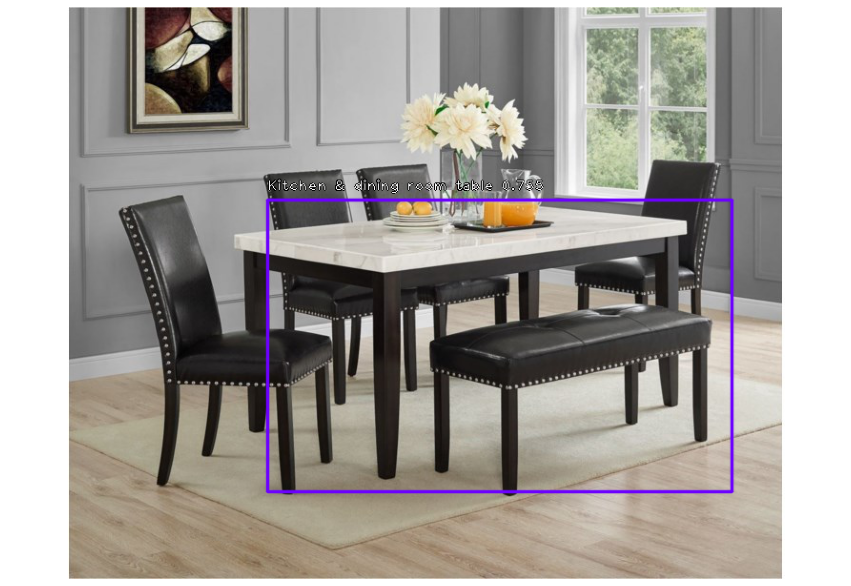

In [ ]:
image = read_image_bgr('/content/products_steve_silver_color_westby-1172854226_wb380t-b3.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()